In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from collections import Counter
from sklearn import metrics

In [2]:
df = pd.read_csv("train_sample.csv")
df2 = pd.read_csv("train_sample_2.csv")

# Analys och val

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df2.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['label'].value_counts().sort_index()

label
0    500
1    500
2    500
3    500
4    500
5    500
6    500
7    500
8    500
9    500
Name: count, dtype: int64

In [6]:
df2['label'].value_counts().sort_index()

label
0    500
1    500
2    500
3    500
4    500
5    500
6    500
7    500
8    500
9    500
Name: count, dtype: int64

In [7]:
df.shape

(5000, 785)

In [8]:
df2.shape

(5000, 782)

In [9]:
df[df.duplicated()]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


In [10]:
df2[df2.duplicated()]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780


In [11]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [12]:
df2.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
Length: 782, dtype: int64

Jag kommer välja dataset 1 att fortsätta med. Båda dataset är ganska lika och har samma fördelning av target dvs 500st av varje label. Ingen dataset har dubletter eller nullvärden. Det som utesluter dataset två däremot är underlig shape av dataset 2 som går inte att göra en 28x28 pixlar matris av. Om vi tar bort label från båda har vi 784 features/pixlar i dataset 1 och 781 i dataset 2. 28x28 blir 784 som fungerar perfekt för att bygga bilder av.

# Rita data och träna modell

In [13]:
df['label'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Datasetet innehåller 10 klasser som består av siffror från 0 till 9.

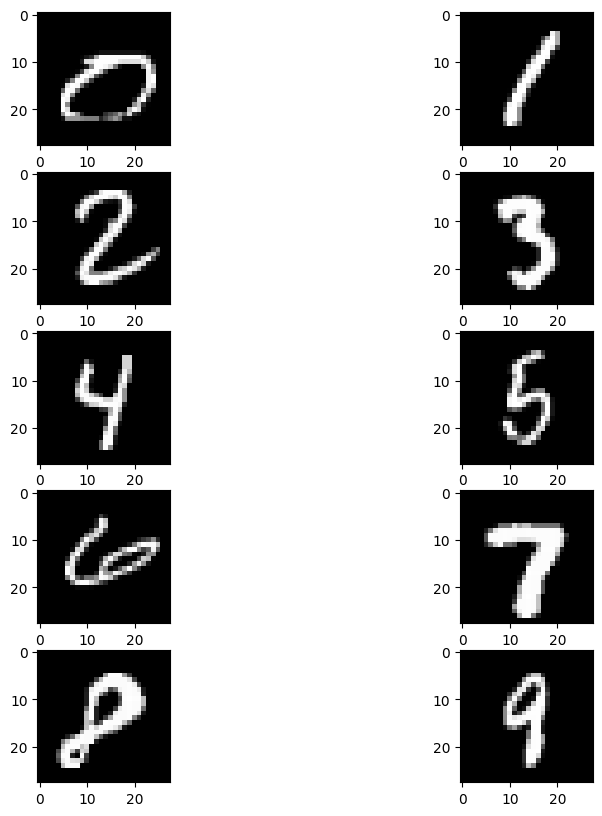

In [14]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10,10))
x = 0
for ax in axs.reshape(-1):
    tmp = df.loc[df['label'] == x]
    tmp_vec = tmp.drop('label', axis=1).iloc[0].values.reshape(28,28)
    ax.imshow(tmp_vec, cmap=plt.cm.gray)
    x = x+1
plt.show()

En visuell representation genom att konvertera 784 pixelinformation till 28x28 pixlar stor bild, ett exempel av varje siffra i datasetet. 

In [15]:
X_train = df.drop(['label'], axis=1)
y_train = df['label']

In [16]:
test_data = pd.read_csv("test_sample.csv")
X_test = test_data.drop(['label'], axis=1)
y_test = test_data['label']

Som vanligt delar vi upp data i traindata och targetdata sen läser vi in testdata.

In [17]:
for x in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train, y_train)
    print(knn.score(X_test, y_test))

0.934
0.924
0.945
0.938
0.945
0.935
0.936
0.934
0.934


Här testar vi score med olika k-värden, default i sklearn är 5 neighbors. Vi ser också att 5 verkar ge en bra resultat för detta dataset som är högst av alla. Det är dock marginellt skillnad på resultat som varierar bara mellan 0.924 och 0.945.

In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
predictions = knn.predict(X_test)

In [20]:
knn.score(X_test, y_test)

0.945

Vi tränar vår modell med default k på 5 och får 0.945 i testscore.

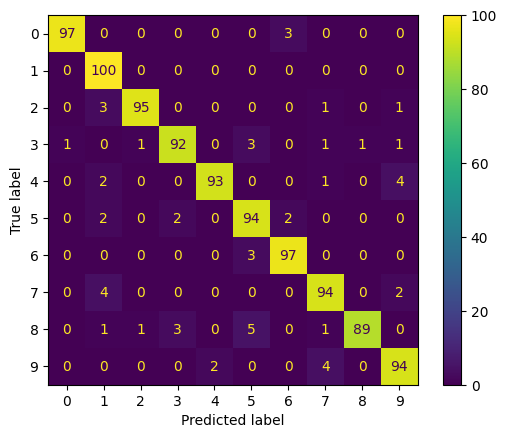

In [21]:
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_).plot();

Vi bygger en confusion matrix för att få en överblick hur väl klassificerar våran modell.

In [22]:
def closest_neighbors(prediction):
    neighbors = knn.kneighbors(X_test.iloc[prediction].values.reshape(1, -1), return_distance=False)
    for x in neighbors[0]:
        tmp_vec = df.drop('label', axis=1).iloc[x].values.reshape(28,28)
        plt.imshow(tmp_vec, cmap=plt.cm.gray)
        plt.show()

Här är funktion som ritar ut närmaste grannar till en prediction. Den letar upp indexes av grannarna med hjälp av knn.kneighbors och sen letar upp deras data och ritar ut på samma vis dvs genom att konvertera till 28x28.

/home/eruxus/Python/maskin2/inl1/env/lib64/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


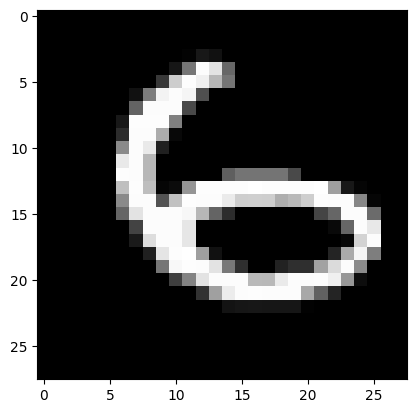

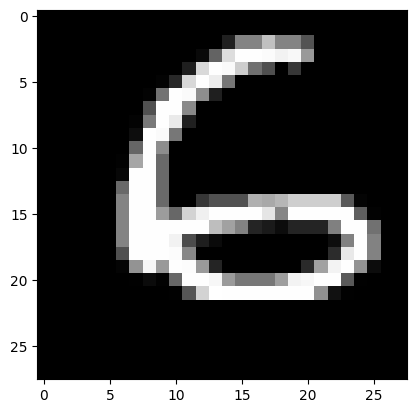

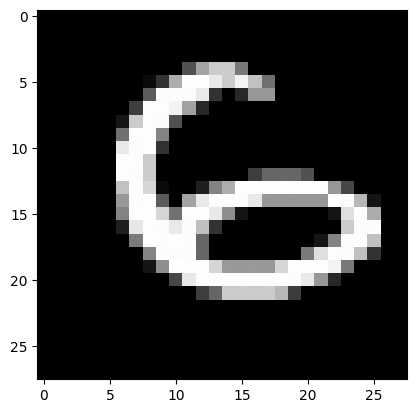

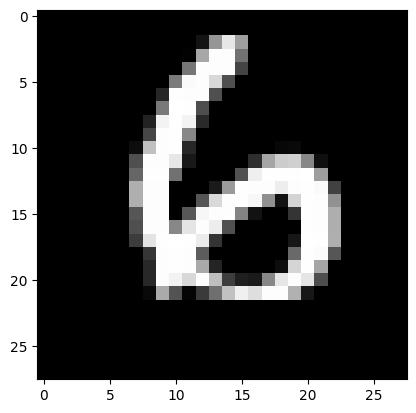

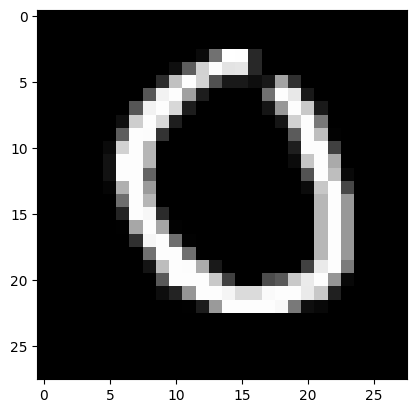

In [23]:
closest_neighbors(666)

In [24]:
wrong_predictions = np.where(y_test != predictions)[0]
wrong_predictions

array([ 63,  83,  97, 224, 246, 256, 286, 294, 318, 323, 350, 352, 358,
       369, 371, 383, 406, 410, 423, 432, 439, 445, 450, 532, 549, 560,
       583, 587, 594, 614, 633, 687, 730, 734, 736, 756, 759, 778, 827,
       830, 831, 858, 867, 872, 877, 880, 882, 890, 893, 903, 940, 949,
       950, 952, 959])

Vi kan även kolla vilka predicions blev fel genom att jämföra dem med y_test.

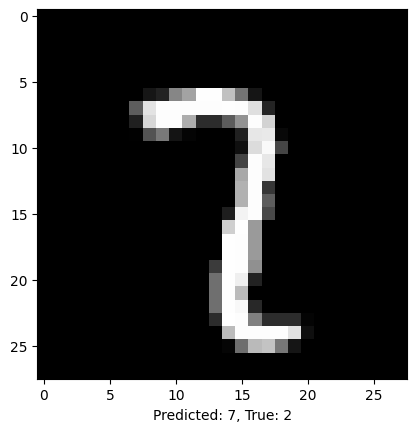

In [25]:
plt.xlabel(f"Predicted: {predictions[224]}, True: {y_test[224]}")
plt.imshow(X_test.iloc[224].values.reshape(28,28), cmap=plt.cm.gray)


Sen kan vi rita ut bilden med information vad som gissades och vad som faktiskt stämmer.

# Egen KNN

In [26]:
def distance(x,y):
    return np.linalg.norm(x-y)

class KNN:
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        
        for x in X.index:
            distances = []
            for y in self.X_train.index:
                distances.append(distance(X.iloc[x],self.X_train.iloc[y]))
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common()
            predictions.append(most_common[0][0])
        return predictions



In [27]:
own_knn = KNN()
own_knn.fit(X_train, y_train)

In [28]:
my_predictions = own_knn.predict(X_test)

In [29]:
metrics.accuracy_score(y_test, my_predictions)

0.942

Våran egna KNN modell fick 94.2% score som är ungefär lika bra resultat som sklearns modell. Den tar dock rätt lång tid på sig att utföra alla beräkningar medan sklearns modell ger resultat nästan omedelbart. Modellen måste räkna ut distans från varje punkt till varje punkt, vid 1000 testpunkter och 5000 trainpunkter blir det en loop med 5000 distansberäkningar för varje testpunkt. Det är 5 miljoner distanser i detta fall med 784 dimensioner per datapunkt också som är rimligt att det skulle ta tid.